In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from cifar_utils import get_datasets, get_datasets_res, plot, show_preds, get_CNN
from utils import train, plot_loss_acc, count_parameters
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score as acc
from tqdm.notebook import tqdm as bar
import matplotlib.pyplot as plt

In [3]:
FOLDER = ".//data//cifar//"
training_set, validation_set, mini_train_set, mini_test_set = get_datasets(FOLDER)
#training_set, validation_set, mini_train_set, mini_test_set = get_datasets_res(FOLDER)
print(len(training_set), len(validation_set))

50000 10000


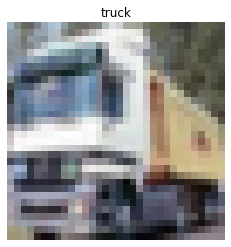

In [4]:
plot(training_set.get_image(1), training_set.get_label(1))

In [233]:
training_gen = DataLoader(training_set, batch_size=128, shuffle=True, num_workers=4)
valid_gen = DataLoader(validation_set, batch_size=128)
mini_train_gen = DataLoader(mini_train_set, batch_size=128, shuffle=True, num_workers=4)
mini_test_gen = DataLoader(mini_test_set, batch_size=128, shuffle=True, num_workers=4)

In [237]:
net = get_CNN([8, 16, 32], 1)
crit = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=0.01, weight_decay=0.006)
net, count_parameters(net)

[Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1)), BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1)), BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)), BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Flatten()]
+-----------+------------+
|  Modules  | Parameters |
+-----------+------------+
|  0.weight |    216     |
|   0.bias  |     8      |
|  1.weight |     8      |
|   1.bias  |     8      |
|  4.weight |    1152    |
|   4.bias  |     16     |
|  5.weight |     16     |
|   5.bias  |     16     |
|  8.weight |    4608    |
|   8.bias  |     32

(Sequential(
   (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
   (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU()
   (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
   (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU()
   (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
   (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (10): ReLU()
   (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (12): Flatten()
   (13): Linear(in_features=128, out_features=10, bias=True)
 ),
 7434)

In [238]:
train_loss, train_acc, test_loss, test_acc = train(net, crit, opt, mini_train_gen, mini_test_gen, 20)


Epoch:1, T Loss:2.125, T acc:0.213 V Loss:2.124, V acc:0.225



Epoch:2, T Loss:1.787, T acc:0.345 V Loss:1.969, V acc:0.280



Epoch:3, T Loss:1.653, T acc:0.404 V Loss:1.767, V acc:0.355



Epoch:4, T Loss:1.514, T acc:0.441 V Loss:2.235, V acc:0.251



Epoch:5, T Loss:1.410, T acc:0.511 V Loss:1.868, V acc:0.335



Epoch:6, T Loss:1.328, T acc:0.531 V Loss:1.826, V acc:0.338



Epoch:7, T Loss:1.233, T acc:0.577 V Loss:2.007, V acc:0.280



Epoch:8, T Loss:1.120, T acc:0.626 V Loss:1.792, V acc:0.357



Epoch:9, T Loss:1.025, T acc:0.670 V Loss:2.184, V acc:0.270



Epoch:10, T Loss:0.910, T acc:0.724 V Loss:1.823, V acc:0.363



Epoch:11, T Loss:0.840, T acc:0.741 V Loss:1.668, V acc:0.406



Epoch:12, T Loss:0.724, T acc:0.772 V Loss:2.095, V acc:0.329



Epoch:13, T Loss:0.640, T acc:0.822 V Loss:1.787, V acc:0.384



Epoch:14, T Loss:0.582, T acc:0.832 V Loss:2.019, V acc:0.344



Epoch:15, T Loss:0.529, T acc:0.867 V Loss:1.973, V acc:0.386



Epoch:16, T Loss:0.448, T acc:0.886 V Loss:2.040, V acc:0.350



Epoch:17, T Loss:0.397, T acc:0.908 V Loss:1.938, V acc:0.371



Epoch:18, T Loss:0.321, T acc:0.942 V Loss:2.033, V acc:0.382



Epoch:19, T Loss:0.292, T acc:0.954 V Loss:2.426, V acc:0.320



Epoch:20, T Loss:0.257, T acc:0.962 V Loss:2.244, V acc:0.357


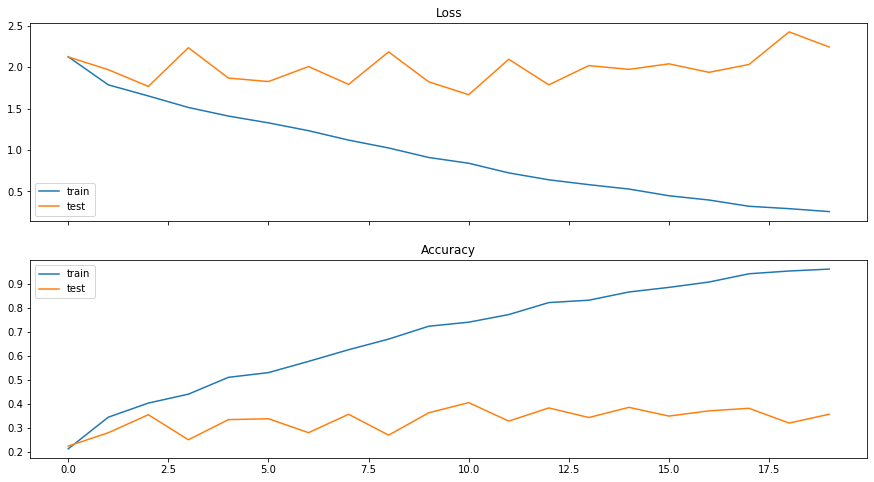

In [239]:
plot_loss_acc(train_loss, train_acc, test_loss, test_acc)

In [15]:
training_set, validation_set, mini_train_set, mini_test_set = get_datasets_res(FOLDER)
#training_gen = DataLoader(training_set, batch_size=128, shuffle=True, num_workers=4)
#valid_gen = DataLoader(validation_set, batch_size=128)
mini_train_gen = DataLoader(mini_train_set, batch_size=32, shuffle=True, num_workers=4)
mini_test_gen = DataLoader(mini_test_set, batch_size=32, shuffle=True, num_workers=4)

In [16]:
i = next(iter(mini_train_gen))[0]
i.shape

torch.Size([32, 3, 224, 224])

In [18]:
import timm

In [23]:
resnet = timm.create_model("resnet18")
for param in resnet.parameters():
    param.requires_grad = True
resnet.fc = nn.Linear(512, 10)
count_parameters(resnet)

+------------------------------+------------+
|           Modules            | Parameters |
+------------------------------+------------+
|         conv1.weight         |    9408    |
|          bn1.weight          |     64     |
|           bn1.bias           |     64     |
|    layer1.0.conv1.weight     |   36864    |
|     layer1.0.bn1.weight      |     64     |
|      layer1.0.bn1.bias       |     64     |
|    layer1.0.conv2.weight     |   36864    |
|     layer1.0.bn2.weight      |     64     |
|      layer1.0.bn2.bias       |     64     |
|    layer1.1.conv1.weight     |   36864    |
|     layer1.1.bn1.weight      |     64     |
|      layer1.1.bn1.bias       |     64     |
|    layer1.1.conv2.weight     |   36864    |
|     layer1.1.bn2.weight      |     64     |
|      layer1.1.bn2.bias       |     64     |
|    layer2.0.conv1.weight     |   73728    |
|     layer2.0.bn1.weight      |    128     |
|      layer2.0.bn1.bias       |    128     |
|    layer2.0.conv2.weight     |  

11181642

In [24]:
crit = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.parameters(), lr=0.01, weight_decay=0.005)

In [25]:
train_loss, train_acc, test_loss, test_acc = train(resnet, crit, opt, mini_train_gen, mini_test_gen, 1)


Epoch:1, T Loss:2.301, T acc:0.188 V Loss:2.457, V acc:0.118


In [269]:
resnet.fc.weight

Parameter containing:
tensor([[ 0.0010, -0.1764, -0.1104,  ...,  0.0704, -0.1387,  0.0257],
        [-0.0194, -0.0750,  0.0150,  ..., -0.0212,  0.0304,  0.0222],
        [-0.0077,  0.1189,  0.0162,  ...,  0.0151, -0.0206, -0.0795],
        ...,
        [ 0.0323,  0.0402, -0.1203,  ...,  0.1042,  0.1312,  0.1676],
        [-0.0148, -0.1562,  0.0259,  ..., -0.0012, -0.0102,  0.0107],
        [-0.0419,  0.0678,  0.0520,  ..., -0.0567, -0.0049,  0.0273]],
       requires_grad=True)

In [230]:
i.shape

(3, 32, 32)

In [298]:
import torch.nn.functional as F
F.interpolate()

TypeError: interpolate() missing 1 required positional argument: 'input'